Mesh Peclet number: 0.6207
Selected time step (dt): 0.000416


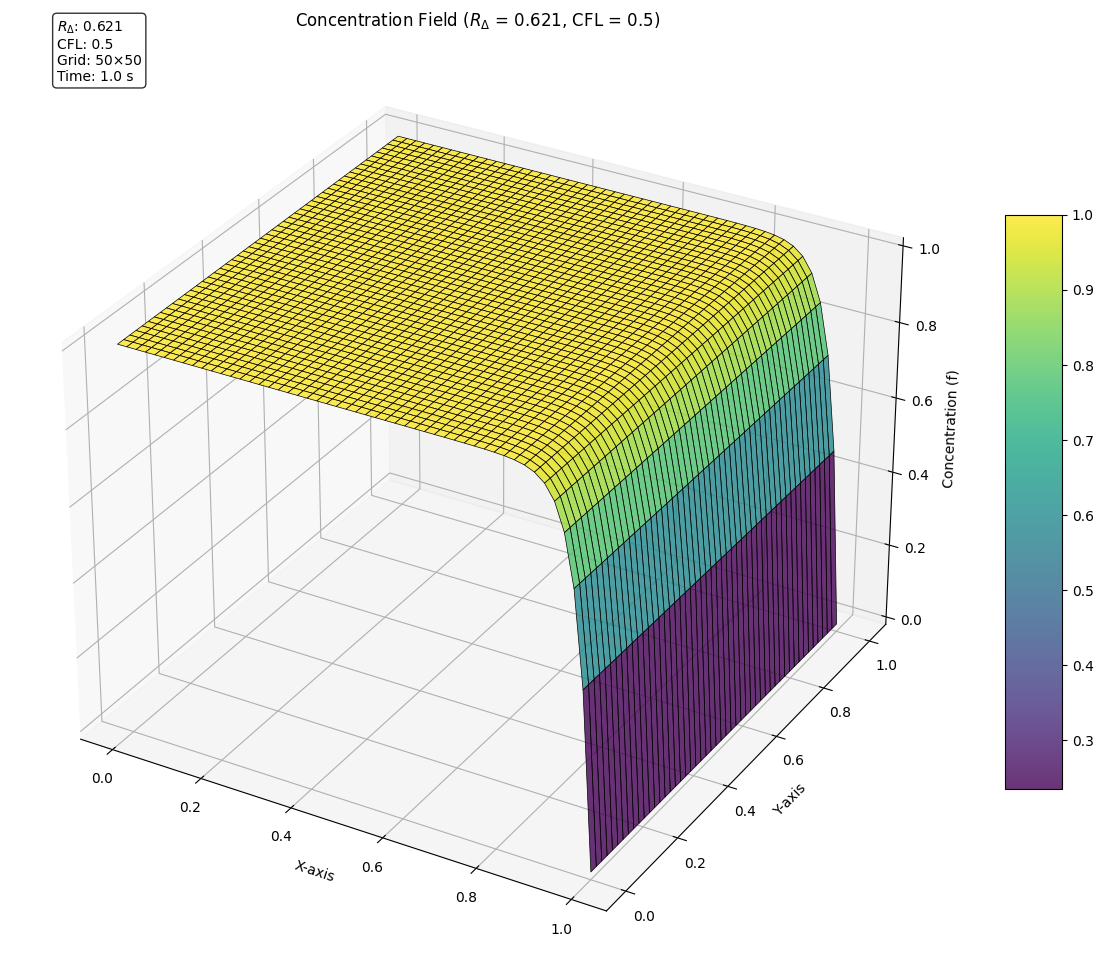

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
D = 0.1  # Diffusion coefficient
Lx = 1   # Length in x direction
Ly = 1   # Length in y direction
nx = 50  # Increased grid resolution
ny = 50  # Increased grid resolution
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)

t_total = 1.0  # Total time

# Velocity components
U = 3 #  3   # Flow velocity in x direction  24
V = 0.5 #  0.5 # Flow velocity in y direction 5.3
Vmean = (U**2 + V**2)**0.5

# Calculate time steps
Courant_number = 0.5  # Reduced Courant number for stability
dt1 = Courant_number * dx / Vmean

# Define diffusion number (sigma)
sigma = 0.1  # Reduced diffusion number

# Compute time step size based on sigma
dt2 = sigma * dx**2 / D

# Final time step
dt = min(dt1, dt2)

# Calculate the number of time steps
n_steps = int(t_total / dt)

# Calculate Peclet number
Peclet_number = Vmean * dx / D

print(f"Mesh Peclet number: {Peclet_number:.4f}")
print(f"Selected time step (dt): {dt:.6f}")

# Initialize concentration field with linear gradient
f = np.zeros((ny, nx))
for j in range(ny):
    f[j, :] = 1 - j/(ny-1)  # Linear gradient from 1 (left) to 0 (right)

# Apply consistent boundary conditions
f[:, 0] = 1    # Left boundary
f[:, -1] = 0   # Right boundary
f[0, :] = f[1, :]  # Top boundary (Neumann)
f[-1, :] = f[-2, :]  # Bottom boundary (Neumann)

# Time-stepping loop
for n in range(n_steps):
    f_new = f.copy()

    # 2nd-order central for both convection and diffusion
    for j in range(1, ny - 1):
        for i in range(1, nx - 1):
            # Diffusion term (2nd-order central)
            diffusion = D * (
                (f[j, i+1] - 2*f[j, i] + f[j, i-1]) / dx**2 +
                (f[j+1, i] - 2*f[j, i] + f[j-1, i]) / dy**2
            )

            # Convection term (2nd-order central)
            convection_x = U * (f[j, i+1] - f[j, i-1]) / (2 * dx)
            convection_y = V * (f[j+1, i] - f[j-1, i]) / (2 * dy)

            # Time update
            f_new[j, i] = f[j, i] + dt * (diffusion - convection_x - convection_y)

    # Apply Neumann BCs (zero-gradient)
    f_new[0, :] = f_new[1, :]
    f_new[-1, :] = f_new[-2, :]

    f = f_new

 

# Create surface plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.linspace(0, Lx, nx), np.linspace(0, Ly, ny))

# Plot surface with improved visualization
surf = ax.plot_surface(X, Y, f, cmap='viridis', 
                       edgecolor='k', linewidth=0.5, 
                       antialiased=True, alpha=0.8)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Concentration (f)')
ax.set_title(f'Concentration Field ($R_{{\\Delta}}$ = {Peclet_number:.3f}, CFL = {Courant_number})')


# Add info box
info_text = (f'$R_\\Delta$: {Peclet_number:.3f}\n'
            f'CFL: {Courant_number}\n'
            f'Grid: {nx}×{ny}\n'
            f'Time: {t_total} s')
ax.text2D(0.05, 0.95, info_text, transform=ax.transAxes,
          bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add colorbar
fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10)
plt.tight_layout()
plt.savefig('Pe16.png', dpi=300, format='png')  
plt.show()